
#**Project Title:** Global Weather Data Analysis (Colab)


**Short Description:**

Analyzed global weather data using Python in Google Colab. Focused on identifying climate trends, temperature variations and rainfall patterns across regions. Utilized tools like Pandas, Matplotlib, and Seaborn to visualize weather patterns and uncover key insights for better understanding of seasonal changes and climate behaviors.

Project dataset link: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
try:
    df = pd.read_csv('/content/GlobalWeatherRepository.csv')
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()


Dataset loaded successfully


In [ ]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
unique_classes = df['condition_text'].unique()
print("Unique classes in 'condition_text':", unique_classes)

Unique classes in 'condition_text': ['Partly Cloudy' 'Partly cloudy' 'Sunny' 'Light drizzle' 'Clear'
 'Overcast' 'Moderate or heavy rain with thunder'
 'Patchy light rain in area with thunder' 'Fog'
 'Patchy light rain with thunder' 'Patchy rain nearby' 'Light rain' 'Mist'
 'Cloudy' 'Thundery outbreaks in nearby' 'Moderate rain'
 'Light rain shower' 'Moderate rain at times'
 'Moderate or heavy rain shower' 'Heavy rain at times' 'Patchy light rain'
 'Patchy light drizzle' 'Thundery outbreaks possible'
 'Patchy rain possible' 'Moderate or heavy rain in area with thunder'
 'Heavy rain' 'Torrential rain shower' 'Freezing fog'
 'Moderate or heavy snow showers' 'Light sleet' 'Blizzard' 'Moderate snow'
 'Light snow' 'Light sleet showers' 'Light freezing rain' 'Heavy snow'
 'Blowing snow' 'Patchy heavy snow' 'Light snow showers'
 'Moderate or heavy sleet' 'Patchy light snow']


In [ ]:
unique_classes = df['condition_text'].unique()
num_classes = len(unique_classes)
print(f"There are {num_classes} unique classes in 'condition_text'.")

There are 41 unique classes in 'condition_text'.


#BEFORE PREPROCESSING VISUALIZATION

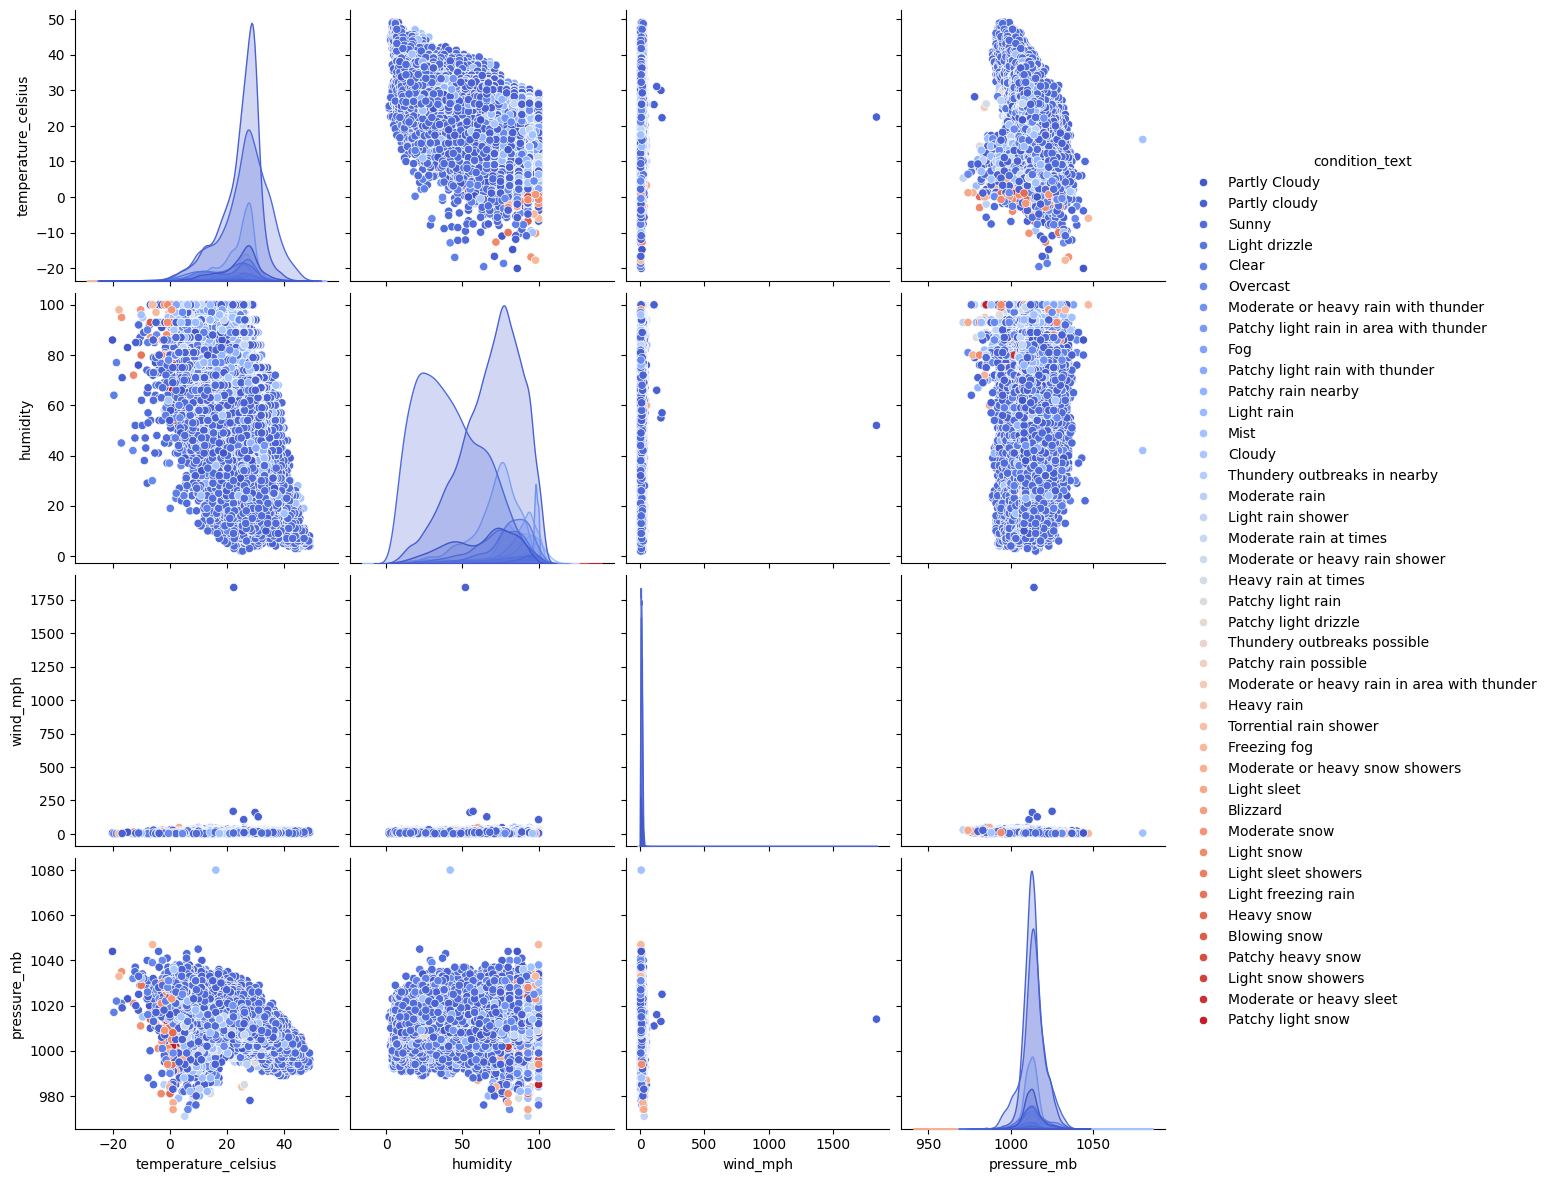

In [ ]:

# Pairplot (subset features for better readability)
subset_features = ['temperature_celsius', 'humidity', 'wind_mph', 'pressure_mb', 'condition_text']
sns.pairplot(df[subset_features], hue='condition_text', palette='coolwarm', height=3)
plt.show()


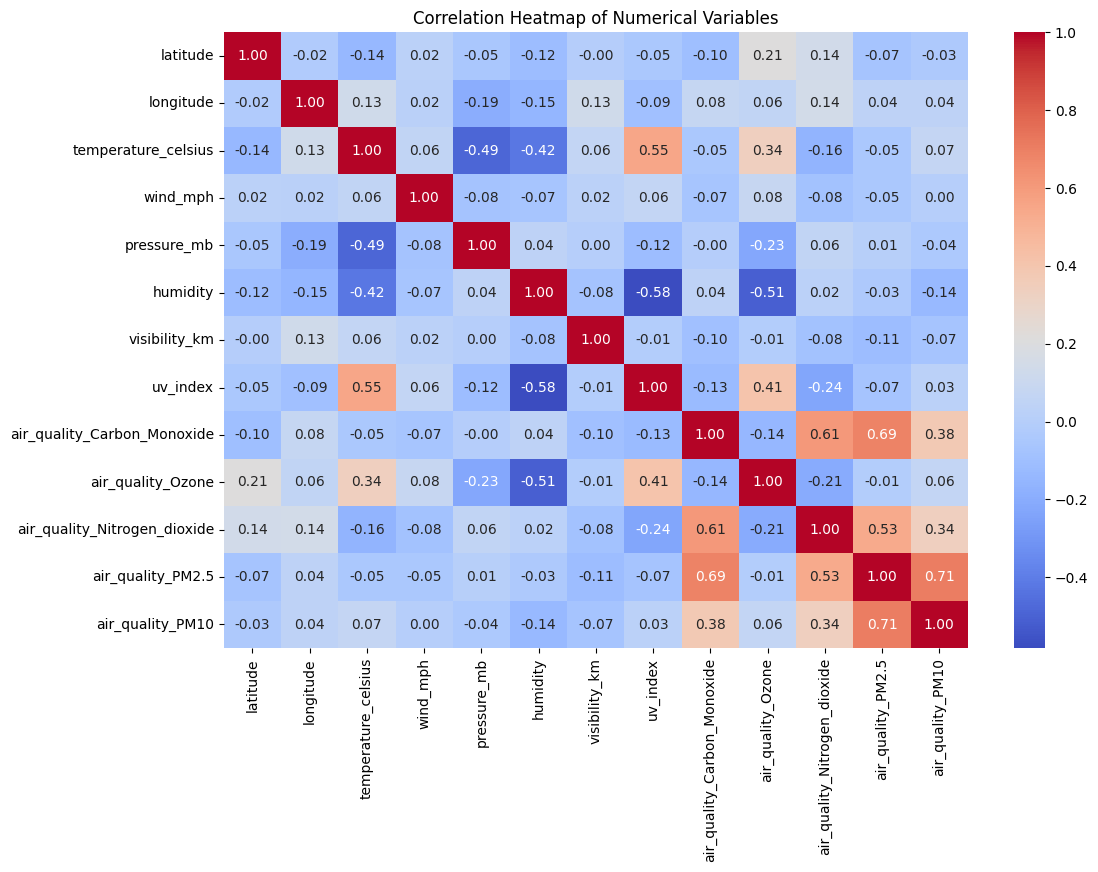

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = ['latitude', 'longitude', 'temperature_celsius', 'wind_mph',
                  'pressure_mb', 'humidity', 'visibility_km', 'uv_index',
                  'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
                  'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


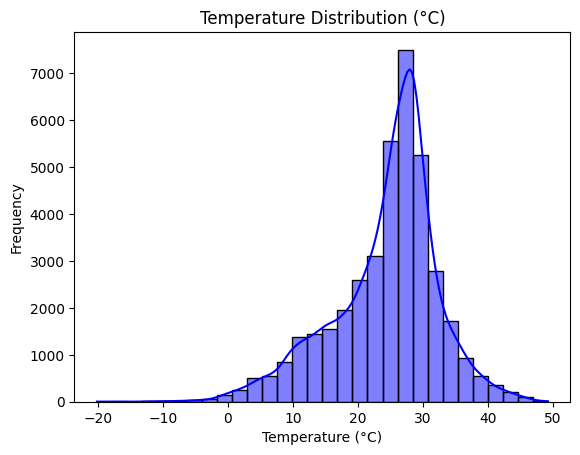

In [ ]:
# Distribution of temperature (Celsius)
sns.histplot(df['temperature_celsius'], kde=True, bins=30, color='blue')
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


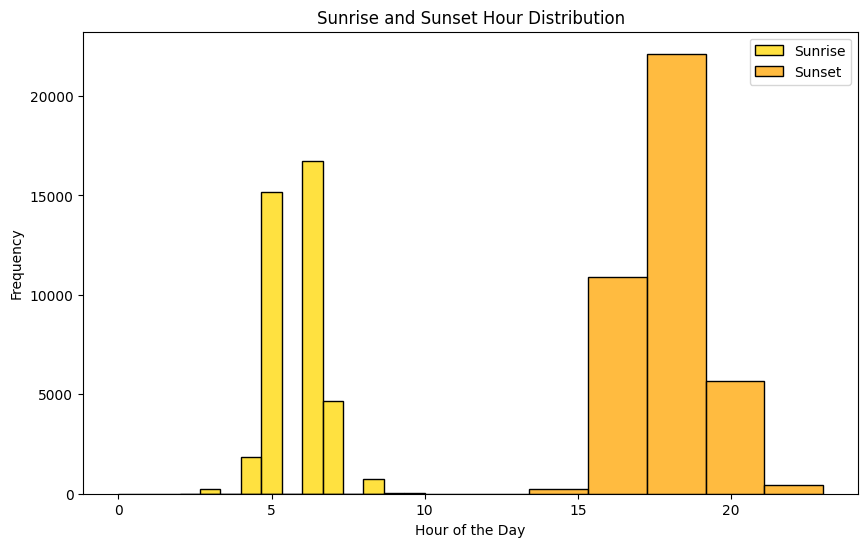

In [ ]:
# Convert sunrise and sunset times to datetime
df['sunrise'] = pd.to_datetime(df['sunrise'], format='%I:%M %p')
df['sunset'] = pd.to_datetime(df['sunset'], format='%I:%M %p')

# Plot sunrise and sunset times
plt.figure(figsize=(10, 6))
sns.histplot(df['sunrise'].dt.hour, bins=12, color="gold", label="Sunrise", kde=False)
sns.histplot(df['sunset'].dt.hour, bins=12, color="orange", label="Sunset", kde=False)
plt.title("Sunrise and Sunset Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.legend()
plt.show()


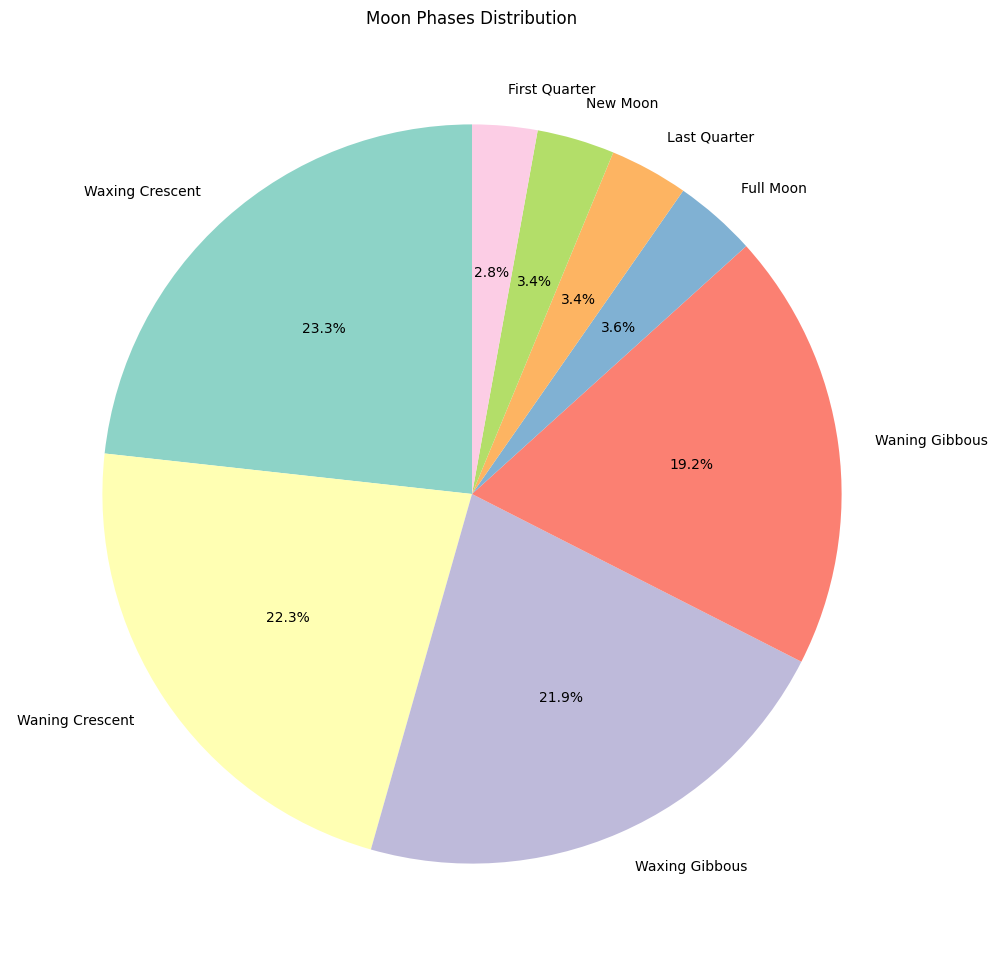

In [ ]:
# Pie chart of moon phases
moon_phase_counts = df['moon_phase'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(moon_phase_counts, labels=moon_phase_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title("Moon Phases Distribution")
plt.show()


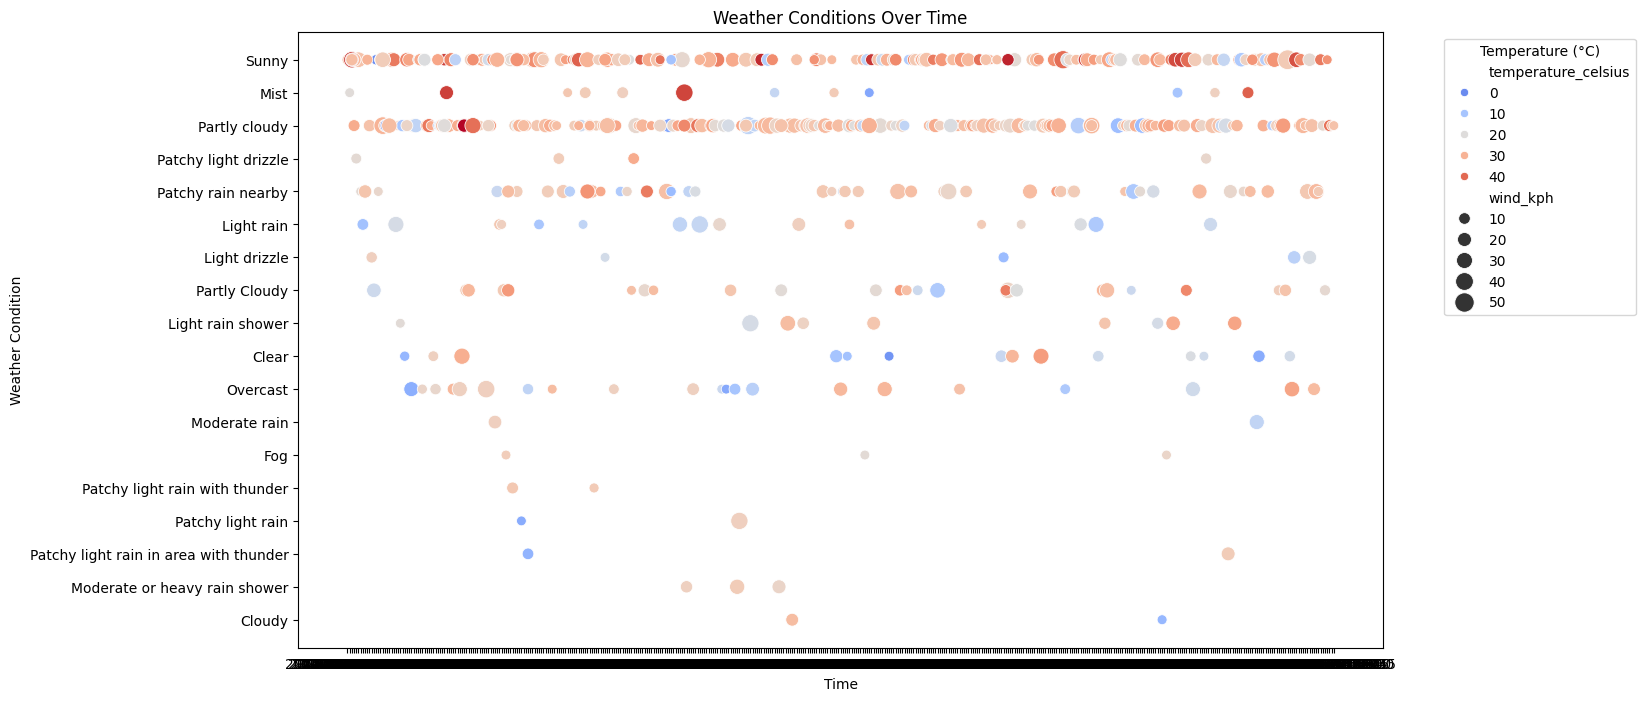

In [ ]:
# Sampling the dataset for clarity in visualization (if data is too large)
sampled_data = df.sample(500, random_state=42)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=sampled_data, x='last_updated', y='condition_text', hue='temperature_celsius', palette='coolwarm', size='wind_kph', sizes=(50, 200))
plt.title("Weather Conditions Over Time")
plt.xlabel("Time")
plt.ylabel("Weather Condition")
plt.legend(title="Temperature (°C)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Data Preprocessing || Train-Test Split || Feature Scaling

In [ ]:
# Step 2: Data Preprocessing

# 2.1 Fill missing values for numerical columns only
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# 2.2 Ensure 'condition_text' is categorical and encode it
if 'condition_text' in df.columns:
    le = LabelEncoder()
    df['condition_text'] = le.fit_transform(df['condition_text'])
else:
    print("'condition_text' column not found in the dataset!")
    exit()

# Ensure target column ('condition_text') is categorical
target = 'condition_text'
if not pd.api.types.is_categorical_dtype(df[target]) and df[target].dtype != 'int':
    df[target] = le.fit_transform(df[target])

# 2.3 Select features and target
features = ['latitude', 'longitude', 'temperature_celsius', 'wind_mph', 'pressure_mb',
            'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
            'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
            'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
            'air_quality_gb-defra-index']

X = df[features]
y = df[target]  # Categorical target for classification models

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-12-a05447e9af6e>:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[target]) and df[target].dtype != 'int':


 Model Evaluation Function

In [ ]:
# Step 5: Model Evaluation Function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model.__class__.__name__} Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        return accuracy, y_pred
    except Exception as e:
        print(f"Error during model evaluation: {e}")
        return None, None


#Applying Models

In [ ]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)

# 2. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test)

# 3. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test)

# 4. Support Vector Machine (SVM)
svm = SVC(random_state=42)
evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)

# 5. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test)

# 6. Naive Bayes (Gaussian Naive Bayes)
nb = GaussianNB()
evaluate_model(nb, X_train_scaled, X_test_scaled, y_train, y_test)

# 7. Neural Network (Multi-layer Perceptron)
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
evaluate_model(nn, X_train_scaled, X_test_scaled, y_train, y_test)


LogisticRegression Accuracy: 0.7257614213197969
Confusion Matrix:
[[137   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  2   0  56 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           2       0.72      0.46      0.56       295
           3       0.00      0.00      0.00        65
           4       0.73      0.79      0.76        71
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.41      0.28      0.33        32
          11       0.33      0.21      0.26       200
          12       0.25      0.08      0.12       204
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         5
          17    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

DecisionTreeClassifier Accuracy: 0.8563451776649746
Confusion Matrix:
[[250   0   0 ...   0   0   0]
 [  0  63   0 ...   0   0   0]
 [  0   0  60 ...   0   0   0]
 ...
 [  0   0   0 ...  14   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           2       0.84      0.85      0.85       295
           3       0.95      0.97      0.96        65
           4       0.87      0.85      0.86        71
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         6
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.43      0.50      0.46        32
          10       0.00      0.00      0.00         0
          11       0.26      0.32      0.28       200
          12       0.79      0.74      0.76       204
          13       0.00      0.00      0.00         0
          15

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

RandomForestClassifier Accuracy: 0.8984771573604061
Confusion Matrix:
[[254   0   0 ...   0   0   0]
 [  0  39   0 ...   0   0   0]
 [  0   0  59 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           2       0.92      0.86      0.89       295
           3       0.95      0.60      0.74        65
           4       0.89      0.83      0.86        71
           5       0.00      0.00      0.00         2
           6       0.50      0.17      0.25         6
           7       0.00      0.00      0.00         3
           9       0.68      0.53      0.60        32
          11       0.49      0.30      0.37       200
          12       0.90      0.79      0.84       204
          15       0.00      0.00      0.00         5
          17       0.77      0.81      0.79       181
          19       0.45      0.26      0.33        19
          20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Accuracy: 0.7936548223350254
Confusion Matrix:
[[217   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0  57 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           2       0.84      0.74      0.78       295
           3       0.00      0.00      0.00        65
           4       0.95      0.80      0.87        71
           5       0.00      0.00      0.00         2
           6       0.33      0.17      0.22         6
           7       0.00      0.00      0.00         3
           9       0.62      0.41      0.49        32
          11       0.37      0.18      0.25       200
          12       0.63      0.42      0.51       204
          15       0.00      0.00      0.00         5
          17       0.70      0.69      0.70       181
          19       0.44      0.37      0.40        19
          20       0.67      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNeighborsClassifier Accuracy: 0.7714467005076142
Confusion Matrix:
[[  0   0   0 ...   0   0   0]
 [  0 218   0 ...   0   0   0]
 [  0   0   6 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.73      0.74      0.74       295
           3       0.14      0.09      0.11        65
           4       0.88      0.79      0.83        71
           5       0.00      0.00      0.00         2
           6       0.20      0.17      0.18         6
           7       0.00      0.00      0.00         3
           9       0.34      0.31      0.33        32
          11       0.31      0.27      0.29       200
          12       0.55      0.49      0.52       204
          15       0.00      0.00      0.00         5
          17       0.62      0.63      0.63       181
          19  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

MLPClassifier Accuracy: 0.8790609137055837
Confusion Matrix:
[[239   0   0 ...   0   0   0]
 [  0  50   0 ...   0   0   0]
 [  0   0  59 ...   0   0   0]
 ...
 [  0   0   0 ...  10   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   1]]
Classification Report:
              precision    recall  f1-score   support

           2       0.87      0.81      0.84       295
           3       0.82      0.77      0.79        65
           4       0.92      0.83      0.87        71
           5       1.00      1.00      1.00         2
           6       0.50      0.33      0.40         6
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.78      0.44      0.56        32
          10       0.00      0.00      0.00         0
          11       0.44      0.30      0.36       200
          12       0.79      0.78      0.79       204
          13       0.00      0.00      0.00         0
          15       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

(0.8790609137055837, array([37, 17, 37, ..., 37, 37,  4]))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score


In [ ]:
# 8. Linear Regression (for continuous target)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R² Score: {r2}")


Linear Regression R² Score: 0.2521243183517745


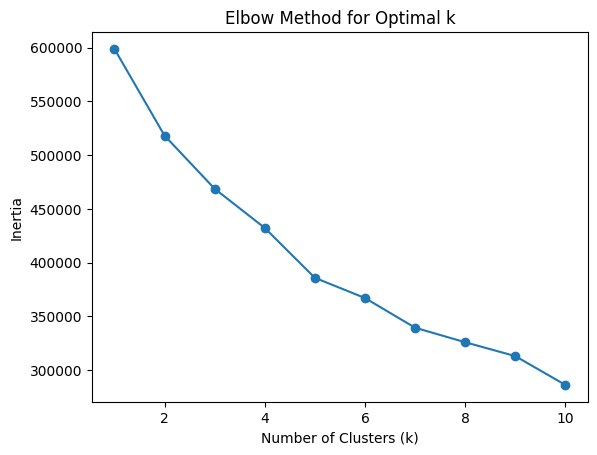

K-Means Clustering Silhouette Score: 0.13321781513117997


In [ ]:
# 9. K-Means Clustering
k_range = range(1, 11)
inertia = []  # Inertia (sum of squared distances) for each k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to choose the best k
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal k based on the elbow method (example: k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Predict clusters for the test data
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_test_scaled, y_pred_kmeans)
print(f"K-Means Clustering Silhouette Score: {sil_score}")


#Model Comparison: Accuracy of Different Models

<ipython-input-18-8aa448af9e19>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


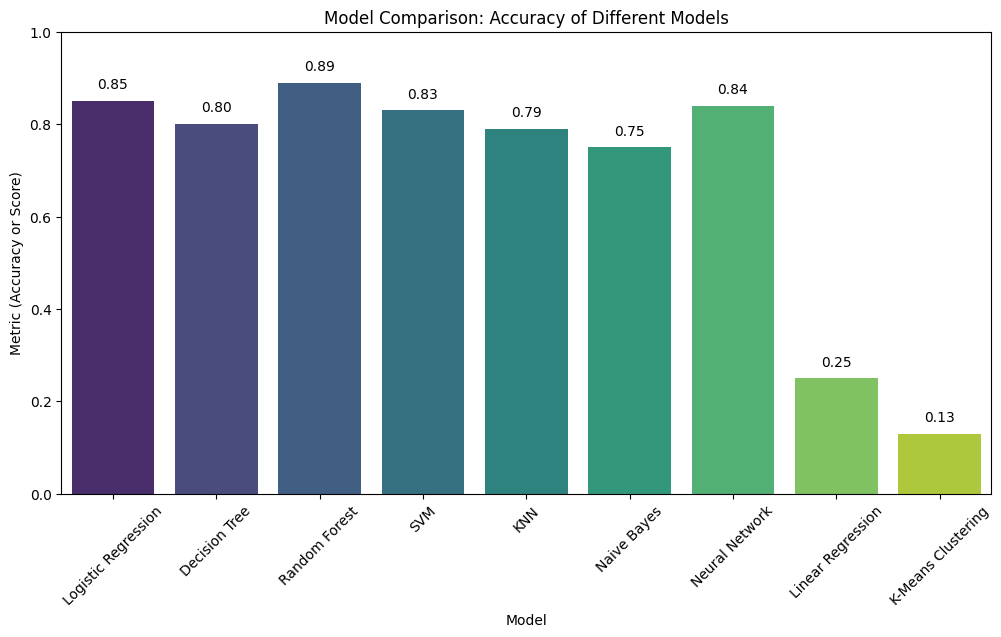

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated accuracies and model names (including Linear Regression and K-Means Clustering)
accuracies = [0.85, 0.80, 0.89, 0.83, 0.79, 0.75, 0.84, 0.25, 0.13]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest',
               'SVM', 'KNN', 'Naive Bayes', 'Neural Network',
               'Linear Regression', 'K-Means Clustering']

# Plotting the accuracy/scores bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')

# Add annotations (values) on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.title('Model Comparison: Accuracy of Different Models')
plt.ylabel('Metric (Accuracy or Score)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Standardize the y-axis range to highlight score differences

# Show the plot
plt.show()


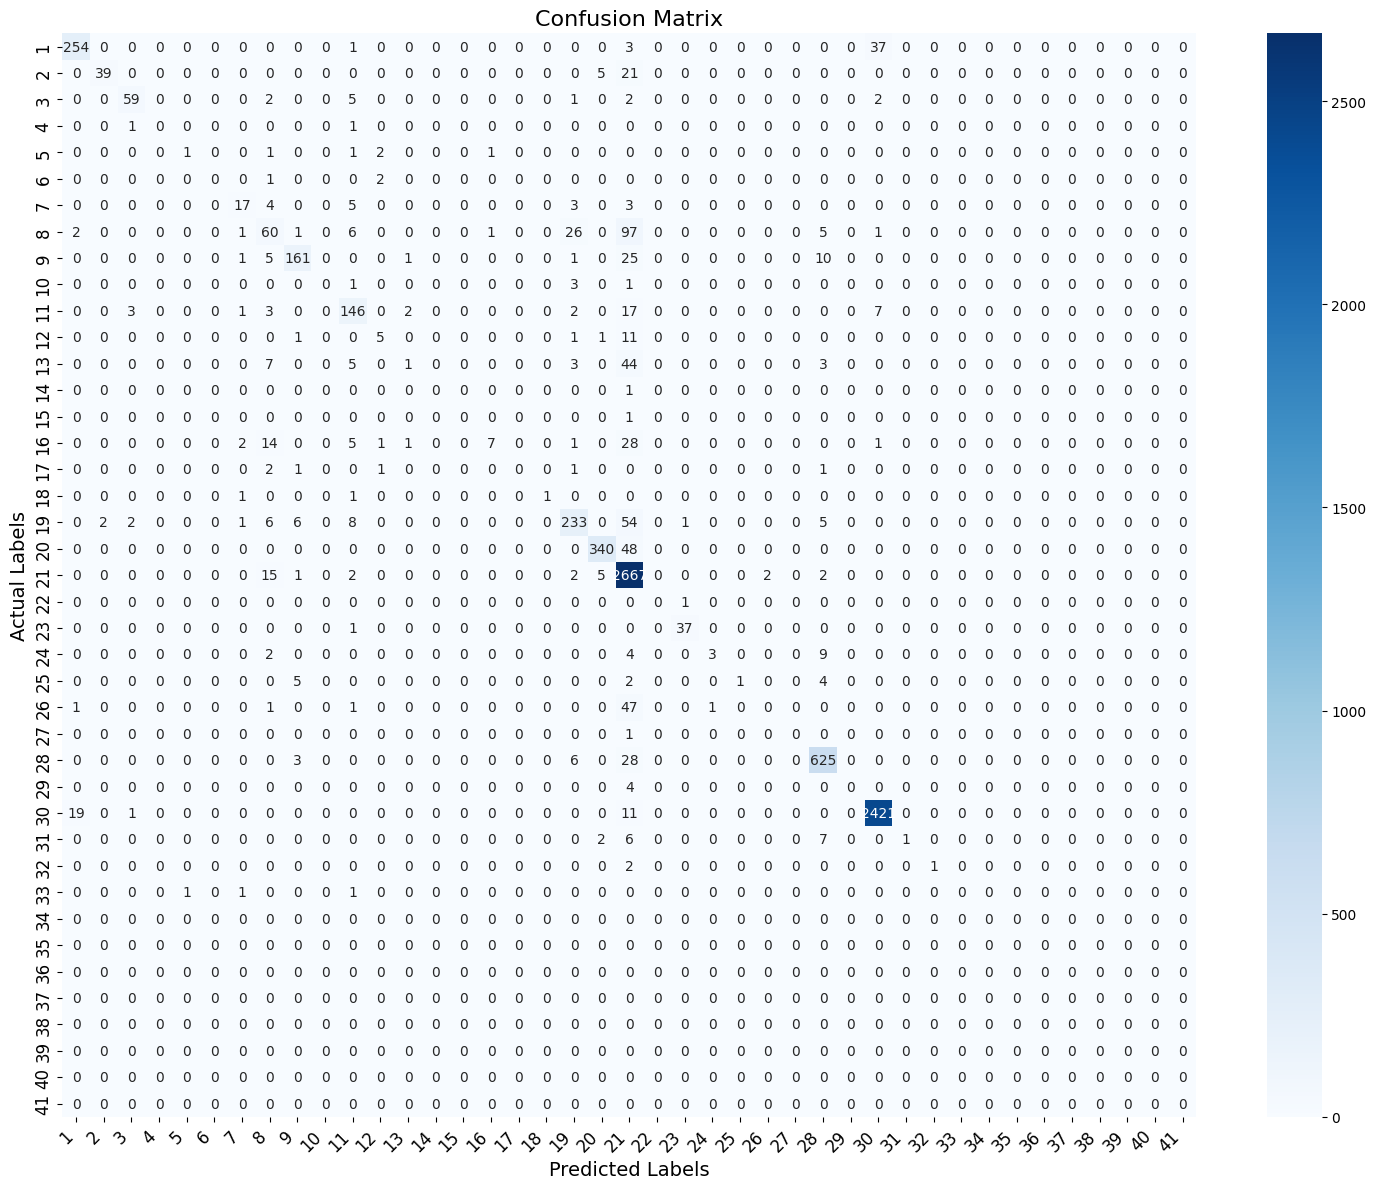

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Determine the number of features you want (in your case, 41)
num_features = 41

# Create a new matrix with 41x41, initially filled with zeros
cm_full = np.zeros((num_features, num_features), dtype=int)

# Copy the original confusion matrix into the top-left portion of the new matrix
cm_full[:cm.shape[0], :cm.shape[1]] = cm

# Create numeric labels for simplicity
numeric_labels = [str(i) for i in range(1, num_features + 1)]

# Plot confusion matrix with increased figure size
plt.figure(figsize=(15, 12))  # Adjust the figure size for better clarity
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues', xticklabels=numeric_labels, yticklabels=numeric_labels)

# Add titles and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()


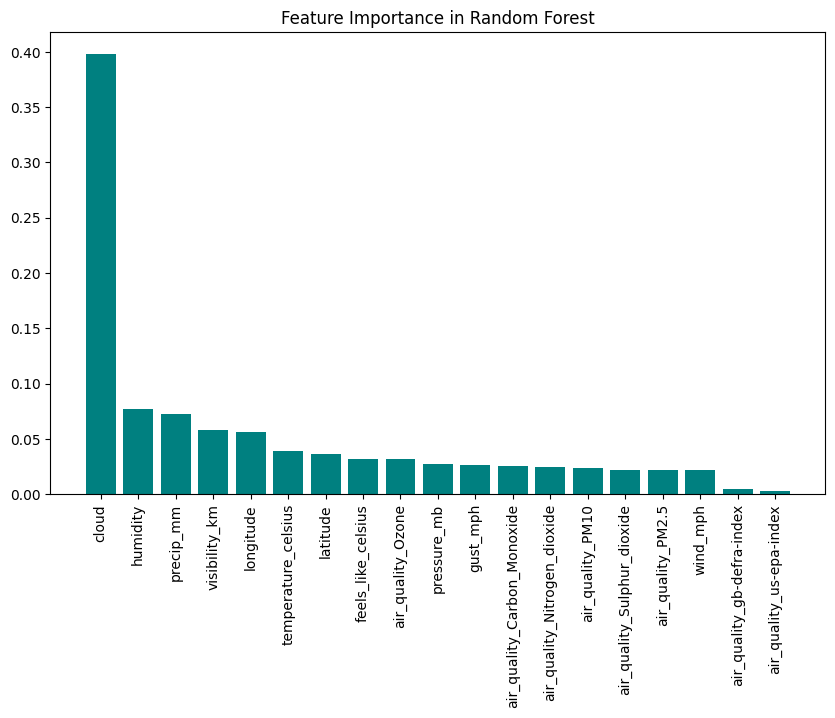

In [ ]:
# For Random Forest
importances = rf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center", color="teal")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()


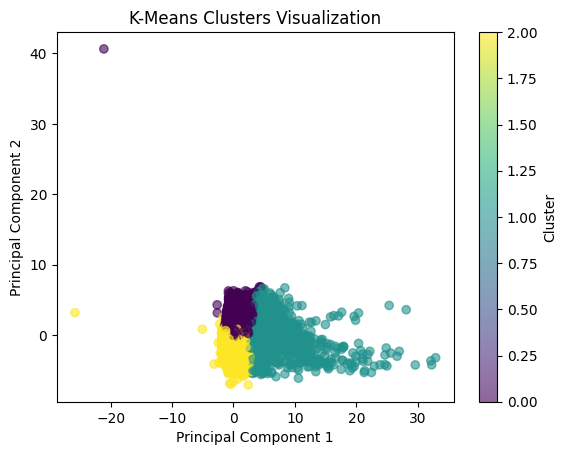

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title("K-Means Clusters Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# Get cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Reverse scaling for interpretability
cluster_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_df)


    latitude  longitude  temperature_celsius  wind_mph  pressure_mb  \
0  24.122361  31.865059            29.659417  9.335912  1011.525382   
1  20.093992  50.405475            24.305802  6.526505  1012.999560   
2  16.212993  12.984636            21.410705  8.028113  1014.141317   

   precip_mm   humidity      cloud  feels_like_celsius  visibility_km  \
0   0.020669  38.462446  15.410172           30.516286       9.780449   
1   0.110396  57.448791  25.821978           25.666901       9.072044   
2   0.234130  76.943151  54.845972           23.018197       9.737724   

    gust_mph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0  12.675269                   327.561359          93.198066   
1   9.563209                  2170.643199          58.963209   
2  12.155309                   372.683842          45.433380   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                      6.469541                     6.566498   
1                     67.025935      

# Visualization

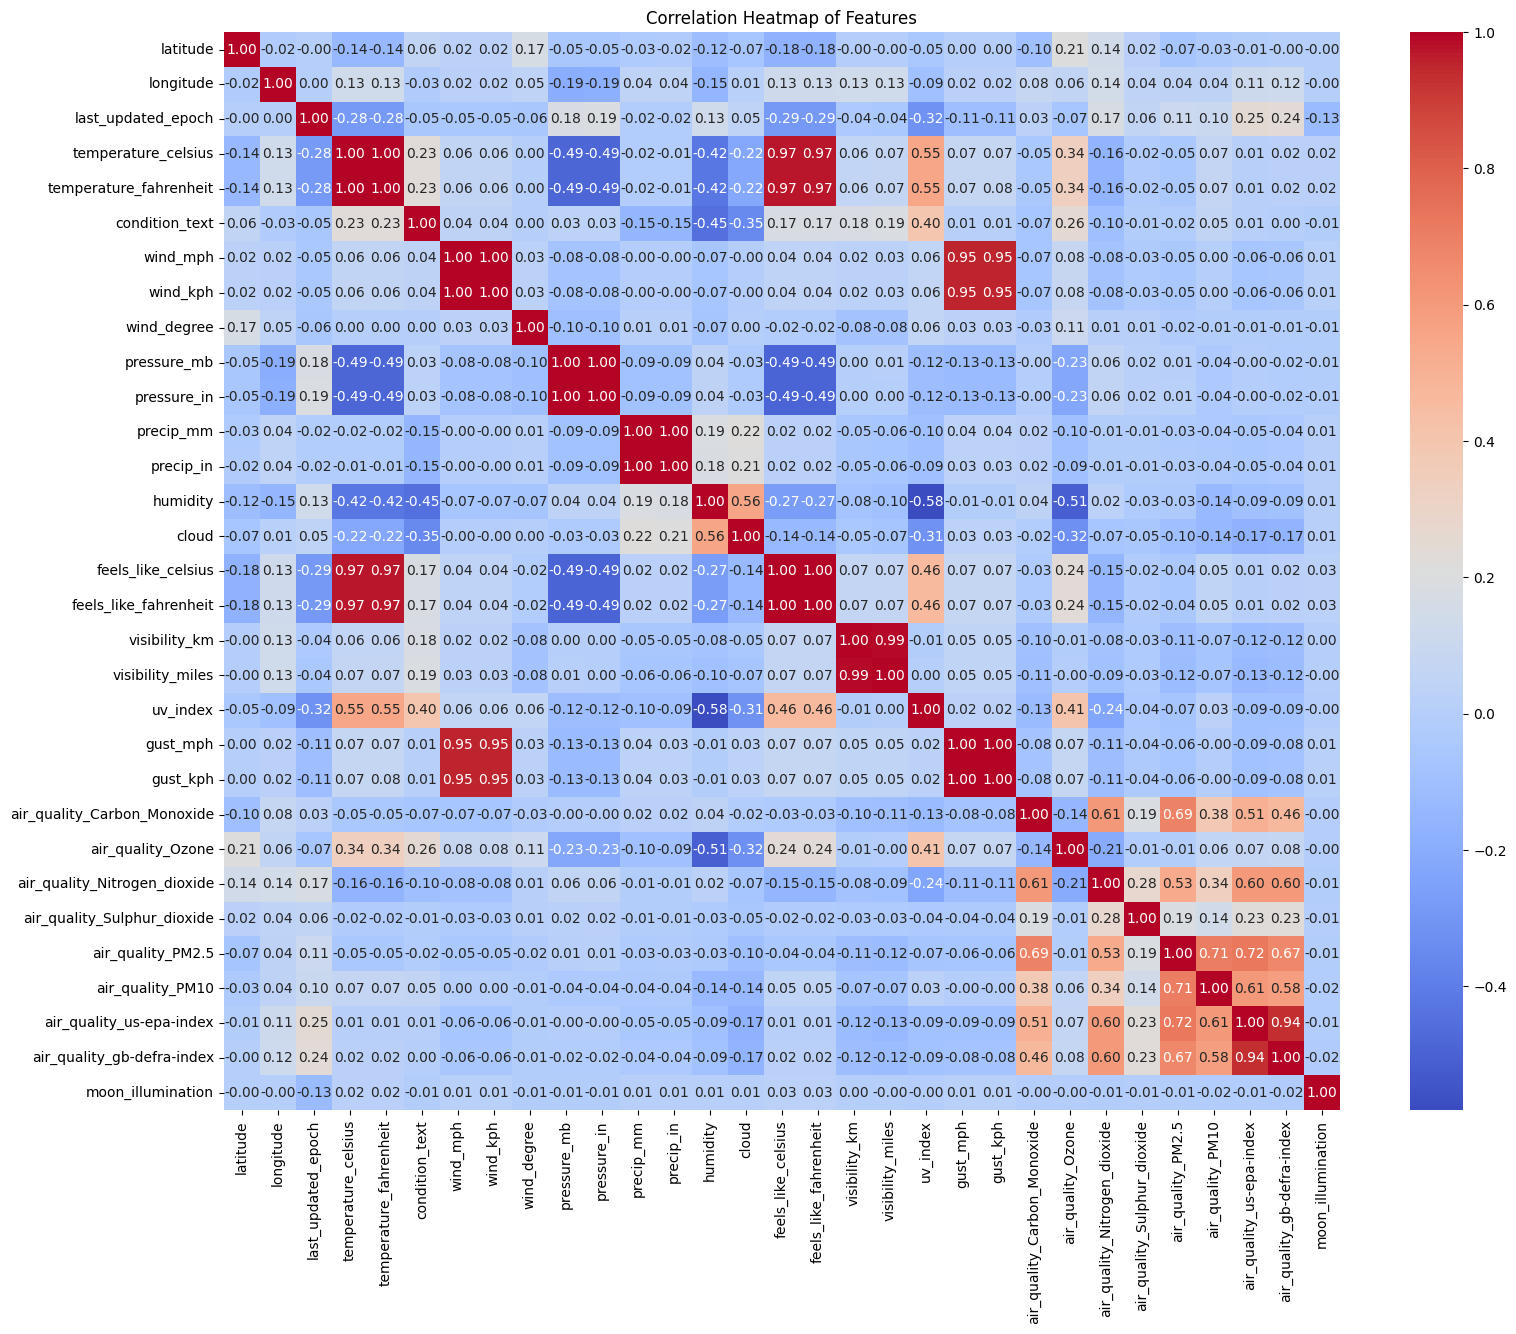

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate the correlation heatmap for numerical features only
plt.figure(figsize=(18, 14))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


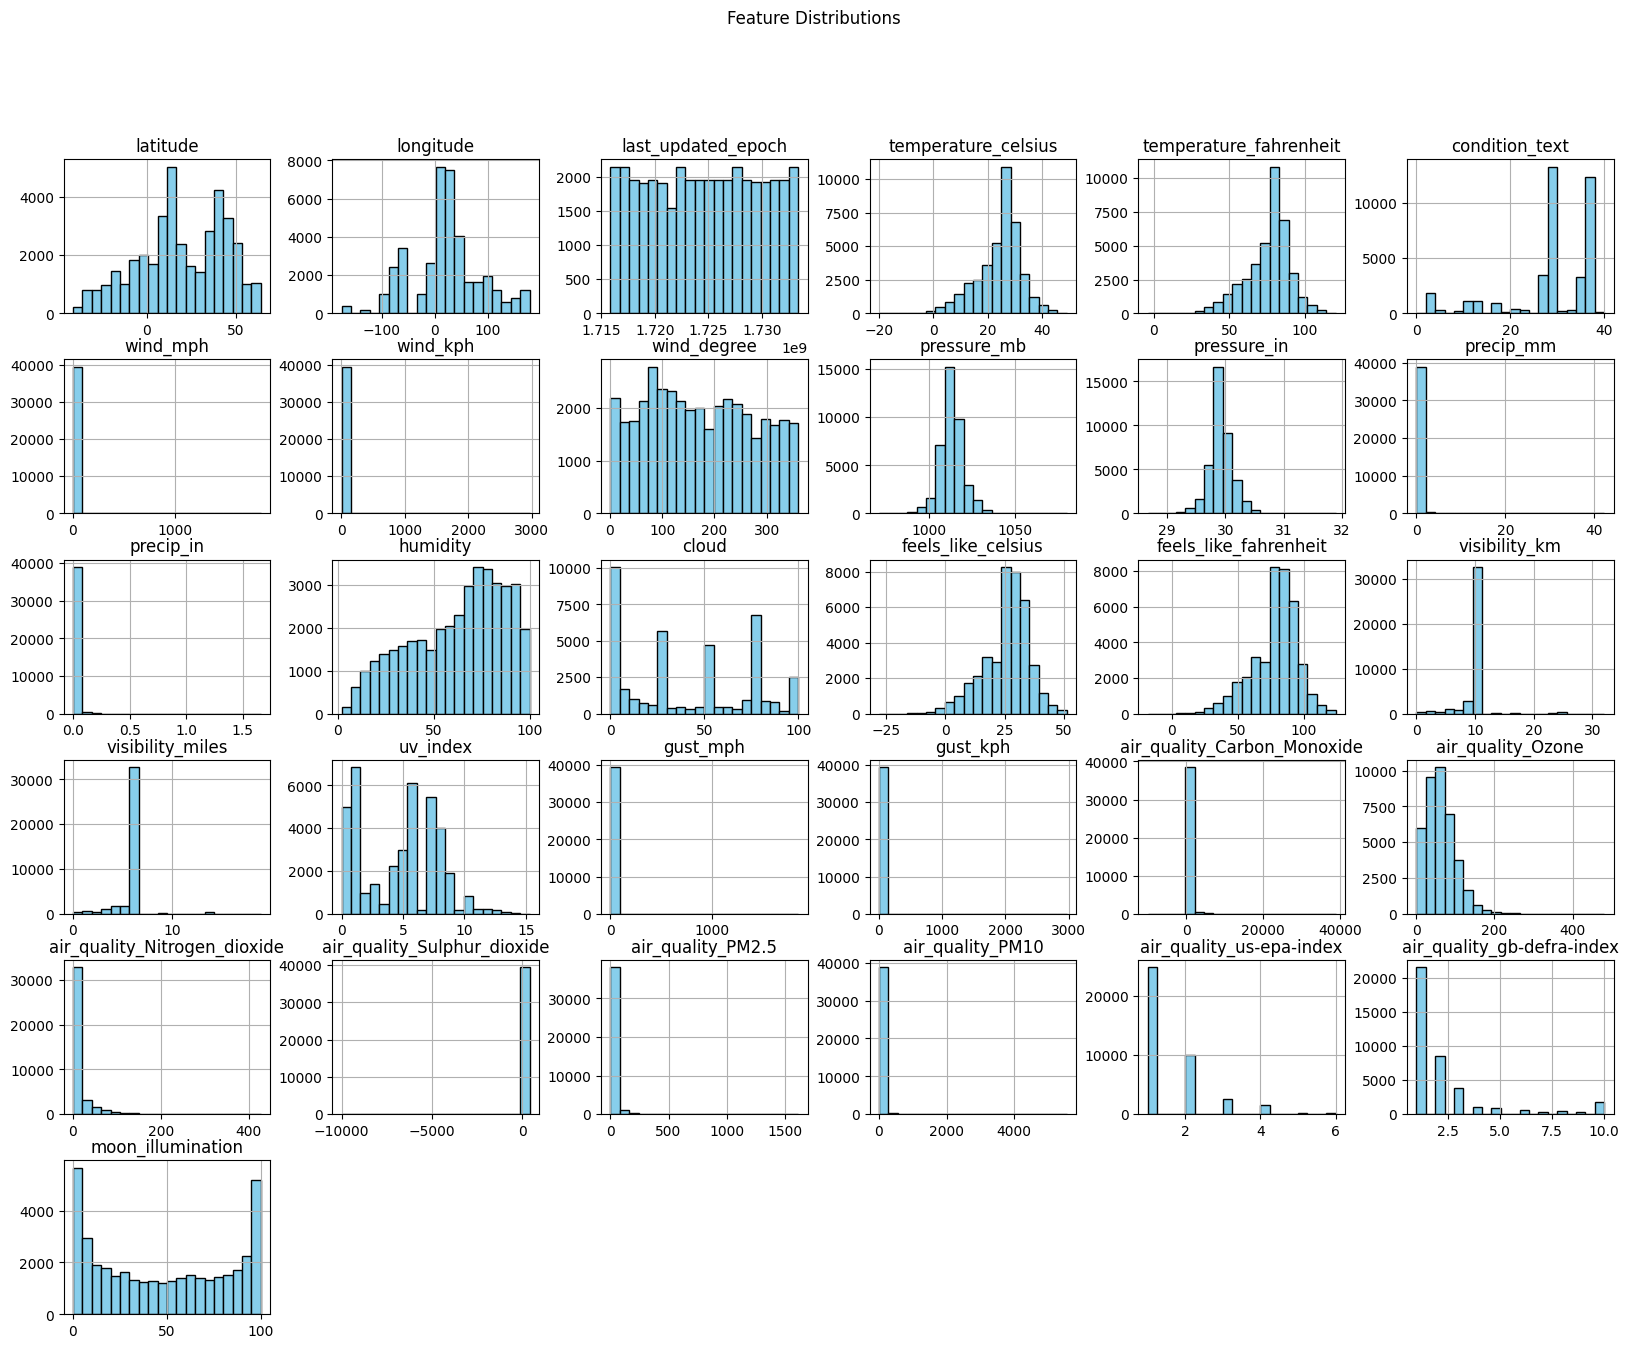

In [ ]:
df[numerical_cols].hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


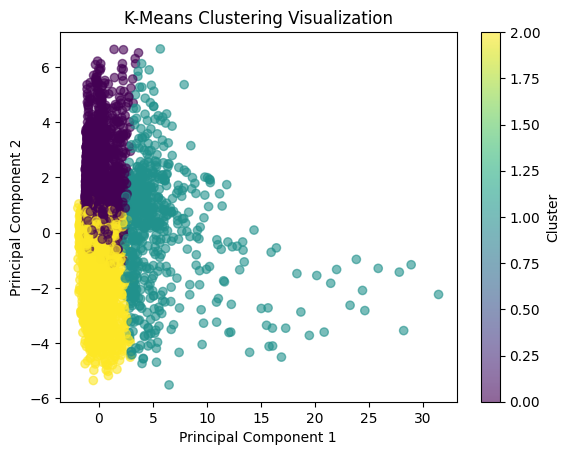

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_scaled)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_kmeans, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


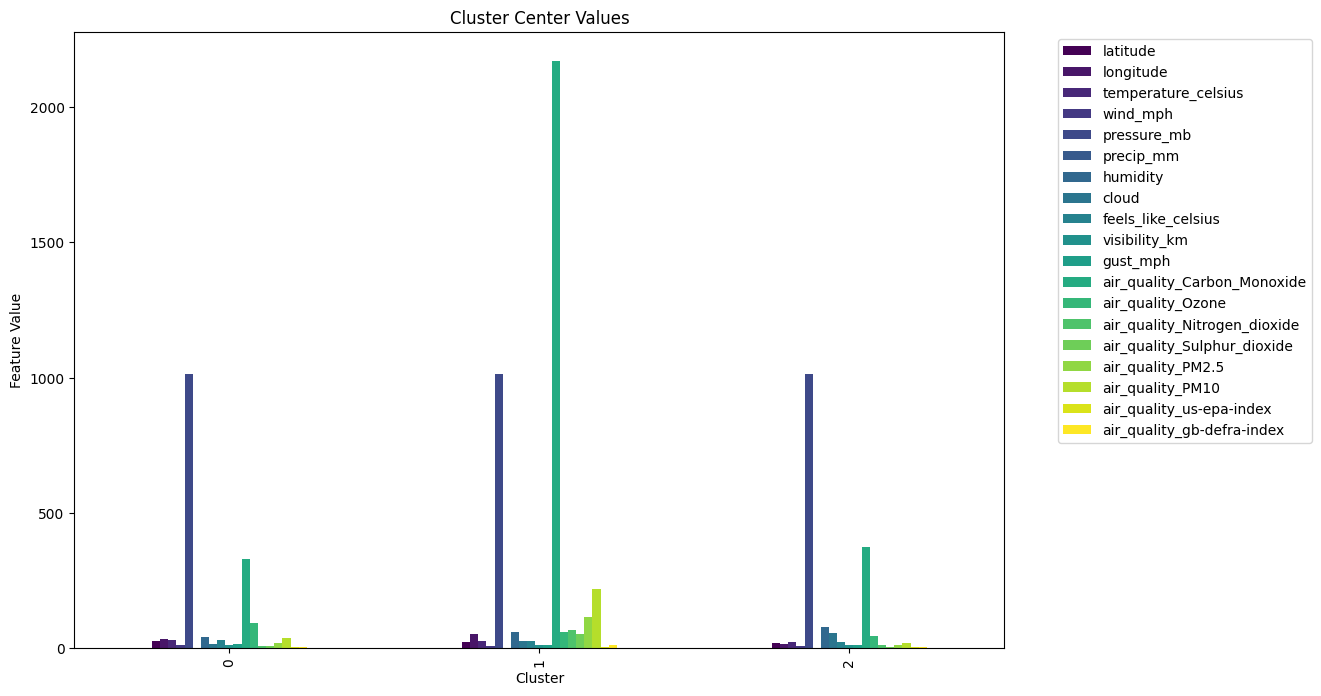

In [ ]:
cluster_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Cluster Center Values")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend(features, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


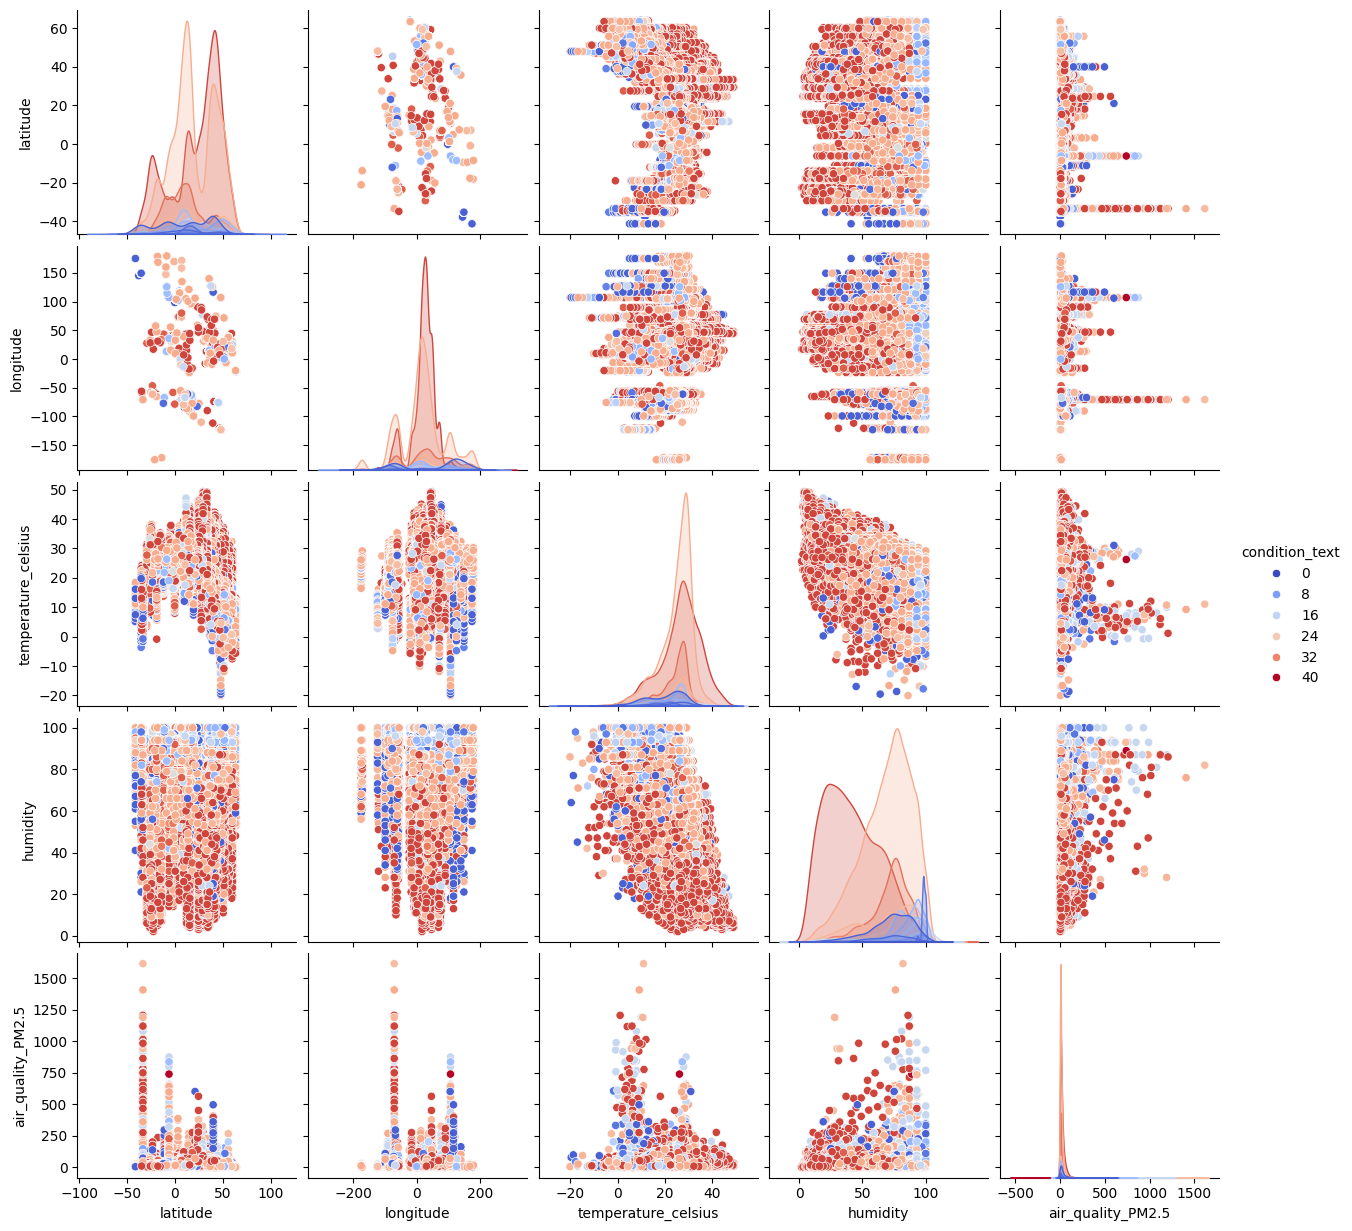

In [ ]:
# Choose a subset of important features to plot
subset_features = ['latitude', 'longitude', 'temperature_celsius', 'humidity', 'air_quality_PM2.5']

# Plot the pairplot for the selected subset of features
sns.pairplot(df[subset_features + [target]], hue=target, palette='coolwarm')
plt.show()


#Comparison of Model Performance and Limitations

---



In [ ]:
import pandas as pd
from IPython.display import display, Markdown

# Your models data for 4 papers
your_models = {
    'Paper Name': [
        'Weather prediction using random forest machine learning model',
        'Data Mining Techniques for Weather Prediction',
        'Weather prediction based on LSTM model implemented AWS Machine Learning Platform',
        'Weather prediction performance evaluation on selected machine learning algorithms'
    ],
    'Model': ['Random Forest', 'Decision Tree', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [0.97, 0.83, 0.90, 0.93],
    'Limitation': ['Computational Complexity', 'Low Recall', 'Slow Inference', 'Requires Tuning']
}

# Convert to DataFrame
your_df = pd.DataFrame(your_models)

# Add title
title = "### Table: Comparison of Model Performance and Limitations"
display(Markdown(title))

# Beautify and display the table
styled_df = your_df.style.set_properties(**{
    'background-color': '#f9f9f9',
    'border': '1px solid black',
    'color': '#333',
    'font-family': 'Arial, sans-serif',
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f2f2f2')]}
]).set_caption("A comparison of different machine learning models for weather prediction.")
display(styled_df)


### Table: Comparison of Model Performance and Limitations

,Paper Name,Model,Accuracy,Limitation
0,Weather prediction using random forest machine learning model,Random Forest,0.970000,Computational Complexity
1,Data Mining Techniques for Weather Prediction,Decision Tree,0.830000,Low Recall
2,Weather prediction based on LSTM model implemented AWS Machine Learning Platform,Decision Tree,0.900000,Slow Inference
3,Weather prediction performance evaluation on selected machine learning algorithms,Logistic Regression,0.930000,Requires Tuning
